# init

In [ ]:
# init
import numpy as np

def trap(func, a, b, n = 100, *args):
  """
  trap: composite trapezoidal rule quadrature

  trap(func, a, b, n, *args): composite trapezoidal rule
  input:
    func = name of function to be integrated
    a, b = integration limits
    n = number of segments (default = 100)
    *args: any extra arguments passed to func (optional)
  output:
    I = estimated integral
  """
  # makeing sure b > a
  assert b > a , " the upper bound b must be greater than the lower bound a"
  assert n % 2 == 0, " the number of segments must be even" 
  x = a
  h = (b - a) / n
  sum = func(a, *args)    # summation = contribution of the first point
  for i in range(1, n):  # adding the middle points with a coefficient of 2
    x = x + h   # location of middle points
    if i % 2 == 0:   # Even
      sum = sum + 2 * func(x, *args)
    else:   # Odd
      sum = sum + 4 * func(x, *args)
  sum = sum + func(b, *args)  # adding the last point
  I = h * sum / 3
  return I 

def trapdata(x, y):
  """
  trapdata: trapezoidal rule quadrature using unequal spaced data points

  trapdata(x, y)
  Applies the trapezoidal rule to determine the integral
  for n nonuniform data points (x, y) where x and y must be of the
  same length and x must be in ascending order
  input:
    x : vector of independent variables (in ascending order)
    y : vector of dependent variables
  output:
    I = estimated integral
  """
  import numpy as np
  # makeing sure x is in ascending order
  xdiff = np.diff(x)
  assert np.min(xdiff) >= 0 , "x array is not in ascending order"
  # makeing sure x and y are of the same size
  assert x.size == y.size , "x and y must have the same lengths"
  n = x.size
  I = 0.
  for i in range(n-1):
    I = I + 0.5 * (y[i] + y[i+1]) * (x[i+1] - x[i])
  return I




In [ ]:
f = lambda x: x**4
z = trap(f,0,0.8,n=2)
print(z)

0.06826666666666668


# Q1

Starting with the `trap` function, Develop a function in python to perform numerical integration using the composite Simpson's 1/3 rule. Test your function by integrating $f(x)=0.2+25x-200x^2+675x^3-900x^4+400x^5$ from $a=0$ to $b=0.8$ using $n=6$ segments. Compare your result with that of the trapezoid rule. The true value of the integral is $1.640533$. Calculate the true relative error for each case.

In [ ]:
# Q1 Answer

# init


def simp(func, a, b, n = 100, *args):
  """
  simp: composite simpson's 1/3 rule

  trap(func, a, b, n, *args): composite trapezoidal rule
  input:
    func = name of function to be integrated
    a, b = integration limits
    n = number of segments (default = 100)
    *args: any extra arguments passed to func (optional)
  output:
    I = estimated integral
  """
  # makeing sure b > a
  assert b > a , " the upper bound b must be greater than the lower bound a"
  assert n % 2 == 0, " the number of segments must be even" 
  x = a
  h = (b - a) / n
  sum = func(a, *args)    # summation = contribution of the first point
  for i in range(0, n):  # adding the middle points with a coefficient of 2
    
    if i % 2 == 0:   # Even
      sum = sum + 2 * func(x, *args)
    else:   # Odd
      sum = sum + 4 * func(x, *args)
    x = x + h   # location of middle points
  sum = sum + func(b, *args)  # adding the last point
  I = h * sum / 3
  return I  

f= lambda x: 0.2 + (25.*x) - (200.*(x**2)) + (675.*(x**3)) - (900.*(x**4)) + (400.*(x**5))
k=simp(f,0,0.8,n=6)
I = trap(f,0,0.8,n=6)

print('trapezoid rule (6 points): I = ', I)
I_true = 1.640533
print('true value: I = ', I_true)
err = abs((I_true - I) / I_true) * 100
print('true error = ', err, '%')
print()
print('Simpson 1/3 rule: I = ', k)
err = abs((I_true - k) / I_true) * 100
print('true error = ', err, '%')


trapezoid rule (6 points): I =  1.6371621399176908
true value: I =  1.640533
true error =  0.20547347004353134 %

Simpson 1/3 rule: I =  1.6549399176954687
true error =  0.8781851810032866 %


# Q2
Determine the distance (in m) traveled between $t=1$ to $10\,min$ numerically by integrating $v$ with respect to $t$ using the following data:
\begin{align*}
&t\,[min] && 1 &&\qquad 2 &&\qquad 3.25 &&\qquad 4.5 &&\qquad 6 &&\qquad 7 &&\qquad 8 &&\qquad 8.5 &&\qquad 9 &&\qquad 10\\
&v\,[m/min] && 300 &&\qquad 360 &&\qquad 330 &&\qquad 420 &&\qquad 510 &&\qquad 480 &&\qquad 360 &&\qquad 420 &&\qquad 420 &&\qquad 300
\end{align*}

1. Use the trapezoidal rule to calculate the integral via the `trapdata` and `trapz` functions and compare the results.
2. Fit the data with a cubic polynomial and use the polynomial to calculate the integral using the python function you developed for the simpson's 1/3 rule.


In [ ]:
t=np.array([1.,2.,3.25,4.5,6.,7.,8.,8.5,9.,10.])
v=np.array([300.,360.,330.,420.,510.,480.,360.,420.,420.,300.])

I1 = trapdata(t,v)
I2 = np.trapz(v,t)

print('trapdata: I = ',I1)
print('trapz: I = ',I2)

co = np.polyfit(t,v,3)
print('Polynomial Coefficents = ',co)
poly = np.poly1d(co)
I3 = simp(poly, 1, 10)
print('I simp: I = ', I3)

trapdata: I =  3607.5
trapz: I =  3607.5
Polynomial Coefficents =  [ -1.08005581  10.51891471   3.6173105  291.03946998]
I simp: I =  3619.5869246625975


# Q3
Compute by hand the first derivative of $y = \sin x$ at $x = \pi/4$ using the step size value of $h = \pi/12$ using 
1. the forward finite-difference with approximations ${\cal O}(h)$ and ${\cal O}(h^{2})$.
2. the backward finite-difference with approximations ${\cal O}(h)$ and ${\cal O}(h^{2})$.
3. the central finite-difference with approximations ${\cal O}(h^{2})$ and ${\cal O}(h^{4})$.

Estimate the true percent relative error for each approximation.

In [ ]:
# Q3 Answer


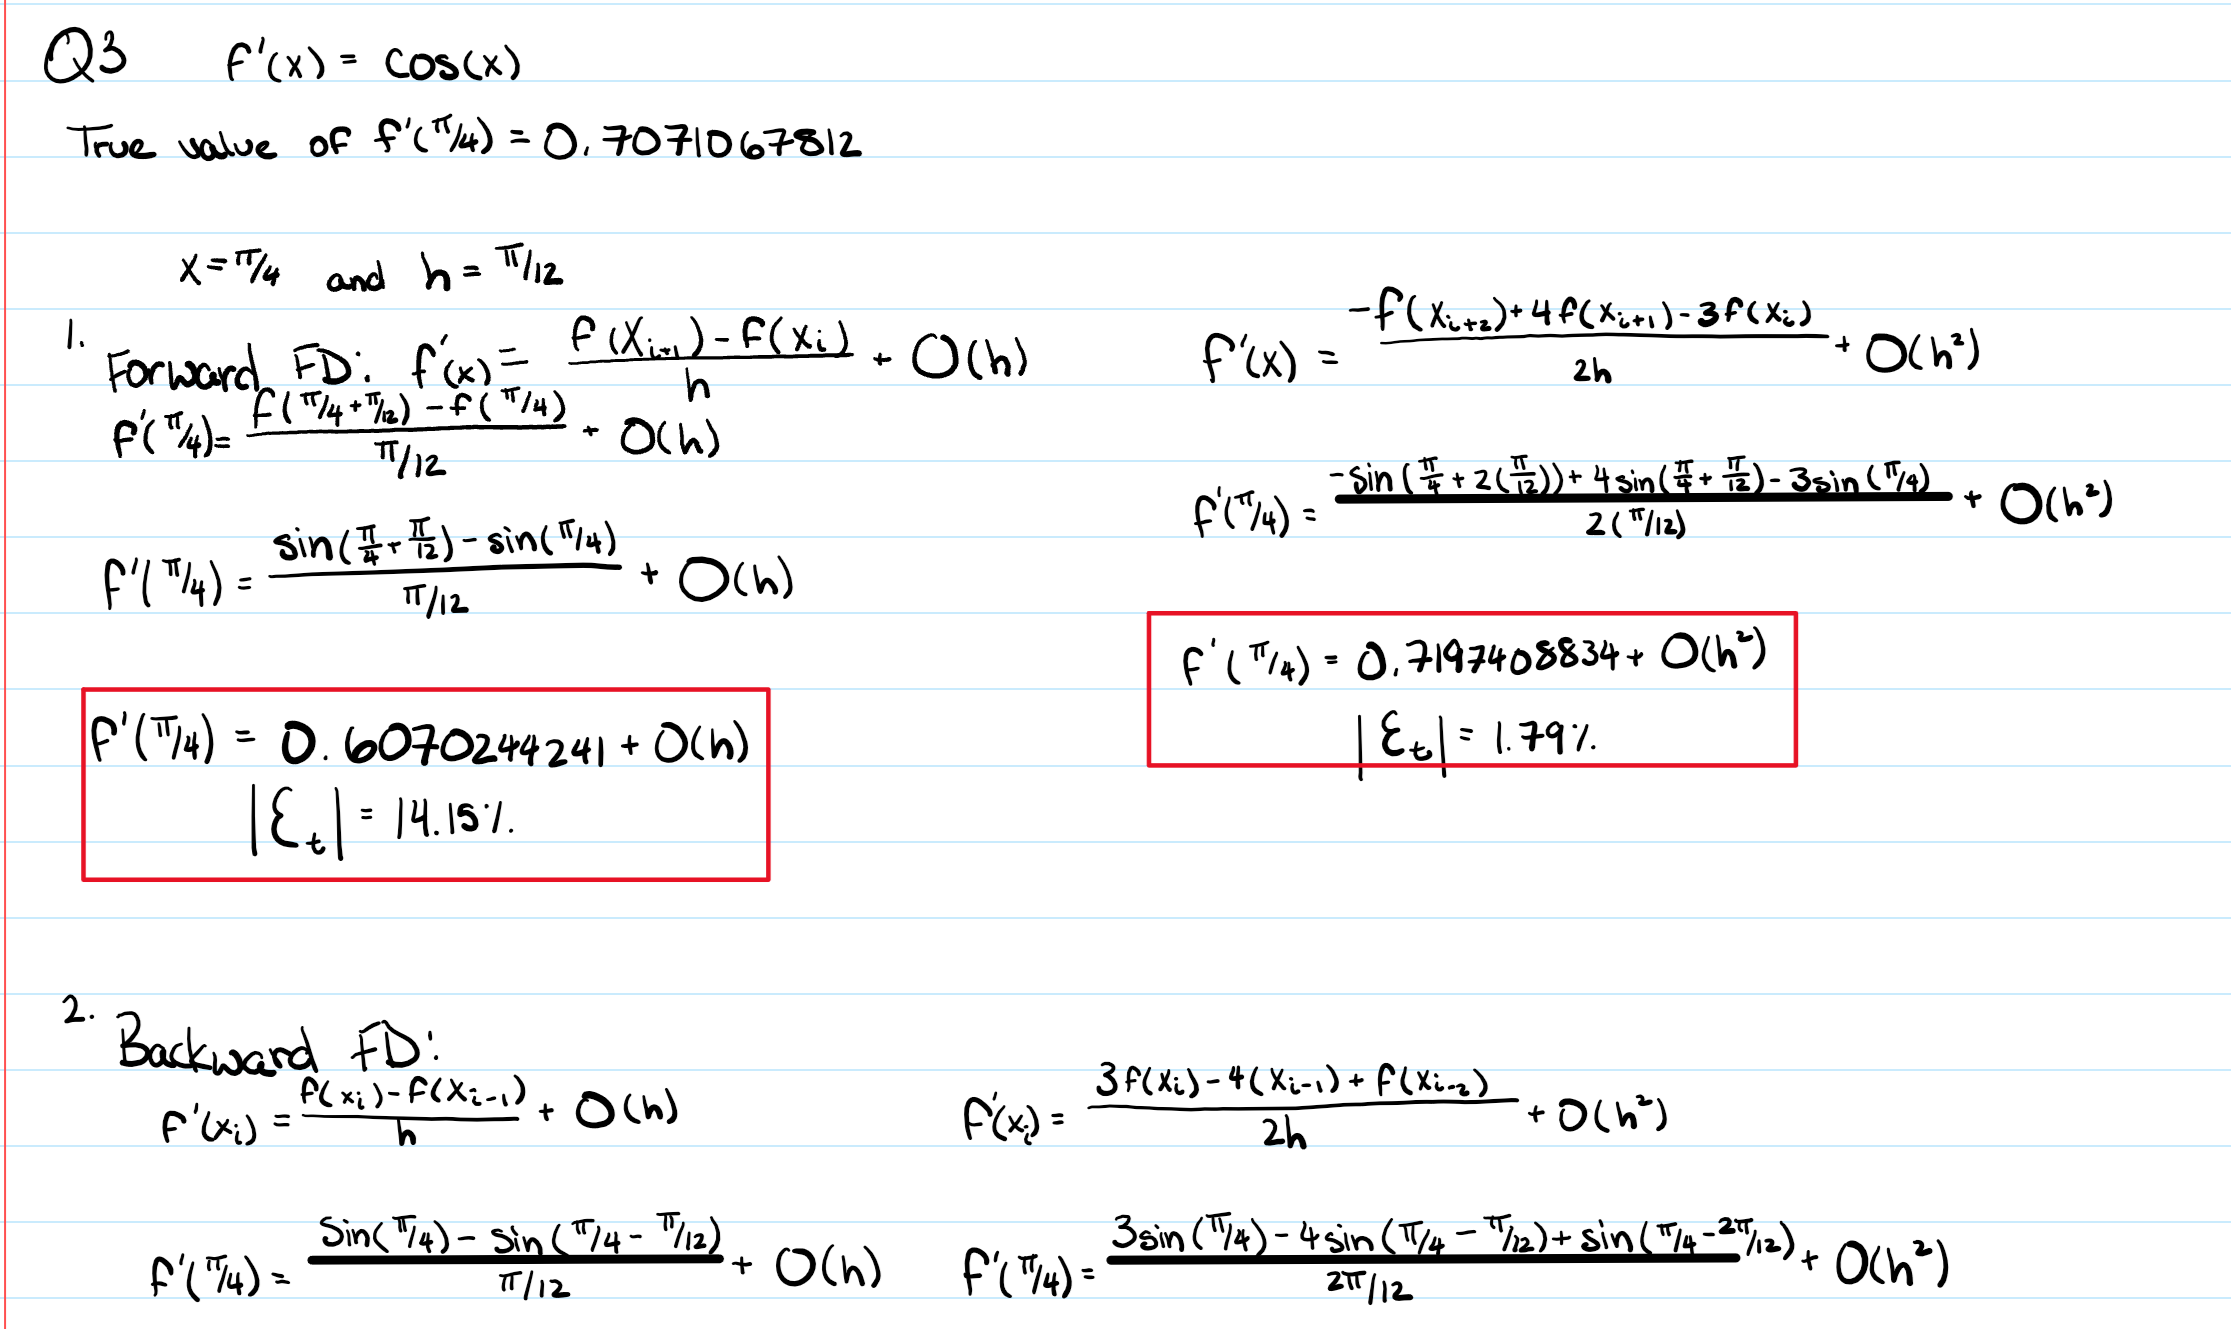



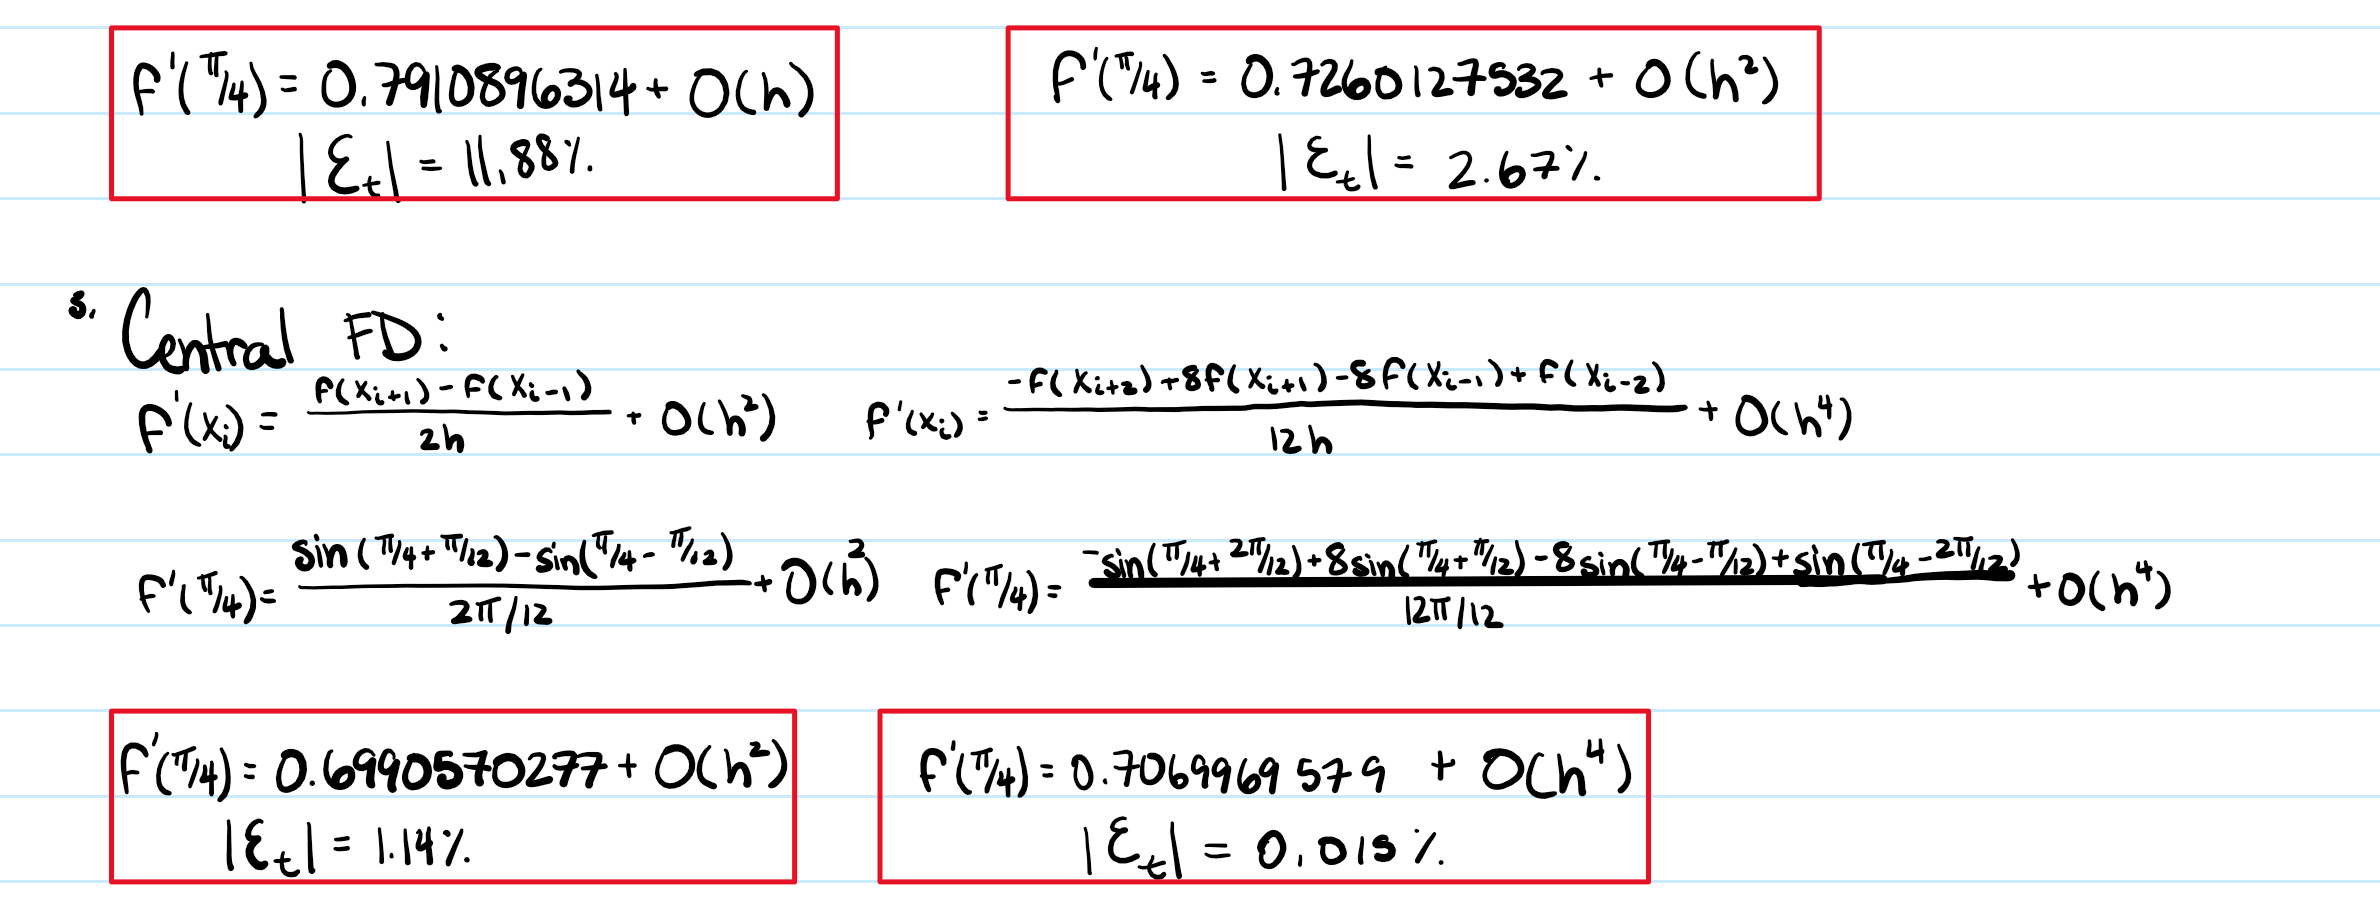

# Q4
Develop a Python function to calculate the first derivative of a function with second order accuracy on equally spaced data points. The template of the function is given below. The derivative should be calculated for all elements of the function with second order accuracy, including the first and the last points. Calculate the derivative of $f(x)=\sin x$ in the range $[0,1]$ with step size $h=\Delta x=0.1$. Compare your results with the analytical derivative of the function.

In [ ]:
# Q4 Answer
import numpy as np
    
def diffc2(f, h = 1):
  """
  diffc2: finds the first derivative using the second order central difference

  diffc2(f, h = 1):
    finds the first derivative second order central difference
    input:
      f = a vector of the dependent function
      h = step size of the independent variable (default h = 1)
    output:
      df = derivative of f  
  """  
  
  i = np.arange(0,1+h,h)    # Creates an array from 0 to 1 with step size 0.1
  df = (f(i+h) - f(i-h)) / (2*h)
  true = np.cos(i)
  error = abs(true - df) / true * 100
  return df, true, error

formula = lambda x: np.sin(x)
der, I, e = diffc2(formula, h = 0.1)

print('diffc2 = ',der)
print('')
print('true = ', I)
print('')
print('error = ', e)





diffc2 =  [0.99833417 0.99334665 0.97843395 0.95374506 0.91952666 0.87612066
 0.82396074 0.76356809 0.69554611 0.62057447 0.53940225]

true =  [1.         0.99500417 0.98006658 0.95533649 0.92106099 0.87758256
 0.82533561 0.76484219 0.69670671 0.62160997 0.54030231]

error =  [0.16658335 0.16658335 0.16658335 0.16658335 0.16658335 0.16658335
 0.16658335 0.16658335 0.16658335 0.16658335 0.16658335]


# Q5

The enthalpy $H$ of a real gas is a function of pressure as described below. The data provided in the table below were taken for a real fluid. Estimate the enthalpy of the fluid at 400 K and 50 atm (evaluate the integral from 0.1 to 50 atm at 400K).
$$
H(T,P) = \int_{0.1}^P \left( V-T \left( \frac{\partial V}{\partial T}\right)_{P}\right) dP
$$


P[atm] |   V[L] at 350K   |   V [L] at 400 K   |   V [L] at 450K
---    | ---          | ---            | ---
0.1|220 | 250 |282.5
5  |4.1 |4.7  |5.23
10 |2.2 |2.5  |2.7
20 |1.35|1.49 |1.55
25 |1.1 |1.2  |1.24 
30 |0.90|0.99 |1.03
40 |0.68|0.75 |0.78
45 |0.61|0.675|0.7
50 |0.54|0.6  |0.62


In [ ]:
# Q5 Answer
import matplotlib.pyplot as plt
P=np.array([0.1,5.,10.,20.,25.,30.,40.,45.,50.])
V350 = np.array([220. , 4.1 , 2.2 , 1.35 , 1.1 , 0.9 , 0.68 , 0.61 , 0.54])
V400=np.array([250.,4.7,2.5,1.49,1.2,.99,.75,.675,.6])
V450 =  np.array([282.5 , 5.23 , 2.7 , 1.55 , 1.24 , 1.03 , 0.78 , 0.7 , 0.62])

dv350 = np.diff(V350)
dv400 = np.diff(V400)
dv450 = np.diff(V450)

V = np.zeros(9)
for i in range(0,len(P)):
  V[i] = (V400[i] - 400*((V450[i]-V350[i])/100)) 
 
I = trapdata(P, V)
I2 = np.trapz(V,P)

print("H = integral is :" , I , '\n trapz: ' ,I2)




H = integral is : 21.440999999999992 
 trapz:  21.44099999999999
